### Created on 2023
### @author: S.W

----

TensorFlow 2.0부터는 Keras API가 TensorFlow의 공식 API로 통합되어 사용됩니다.<br>
이전 버전의 TensorFlow에서는 Keras API를 따로 설치해 사용하였지만, TensorFlow 2.0부터는 TensorFlow의 일부분으로 내장되어 있습니다.<br>
TensorFlow 2.0의 Keras API는 Sequential API, Functional API, Subclassing API로 구성됩니다. <br>
이 API들을 사용하여 딥러닝 모델을 쉽게 구성하고 학습시킬 수 있습니다.<br>

- Sequential API: 이 API는 간단한 모델을 쉽게 만들 수 있는 API입니다. 각 레이어를 차례대로 추가하는 방식으로 모델을 구성합니다. Sequential API는 간단한 모델을 만들 때 유용합니다.

- Functional API: 복잡한 모델을 구성할 때 사용하는 API입니다. 각 레이어를 함수처럼 호출하여 모델을 구성합니다. 다중 입력 또는 다중 출력 모델을 만들 수 있습니다. Functional API는 Sequential API보다 더 유연하게 모델을 구성할 수 있습니다.

- Subclassing API: TensorFlow의 일반적인 프로그래밍 방식처럼 모델 클래스를 직접 작성하는 방식으로 모델을 구성합니다. 이 방식을 사용하면 모델에 대한 완전한 제어권을 갖게 됩니다. 하지만 구현이 복잡하고 디버깅이 어려울 수 있습니다.

Keras API는 TensorFlow를 쉽게 사용할 수 있도록 설계된 API입니다. <br>
이 API를 사용하면 딥러닝 모델을 쉽게 구성하고 학습시킬 수 있으며, 다양한 딥러닝 모델을 구현할 수 있습니다.<br>
TensorFlow 2.0에서는 Keras API가 TensorFlow의 일부분으로 내장되어 있으므로, TensorFlow를 사용하면서도 Keras API를 사용할 수 있습니다.

## 학습에 필요한 라이브러리 불러오기

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

import PIL

## 데이터 불러오기

우선 MNIST 데이터셋을 불러와야 합니다. Keras에서는 keras.datasets 모듈을 통해 MNIST 데이터셋을 불러올 수 있습니다.

MNIST는 0부터 9까지의 숫자가 적힌 손글씨 이미지 데이터셋입니다.<br> 
MNIST는 기계 학습 분야에서 널리 사용되는 데이터셋 중 하나로, 약 6만 개의 훈련 이미지와 1만 개의 테스트 이미지로 구성되어 있습니다.<br>
이 이미지는 28x28 픽셀의 흑백 이미지입니다.

MNIST 데이터셋은 손글씨 숫자를 인식하는 데 사용되며, 이를 통해 컴퓨터 비전 분야에서 딥러닝 모델의 성능을 평가하는 데 사용됩니다. 

#### tensorflow에서 가져올 수 있는 데이터셋 목록
- https://www.tensorflow.org/datasets/catalog/overview

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# 정규화(데이터 전처리)
train_images = train_images / 255.0
test_images = test_images / 255.0

In [3]:
# shape()를 통해 데이터 모양 확인하기
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

AxesImage(80,52.8;496x369.6)
숫자:  7


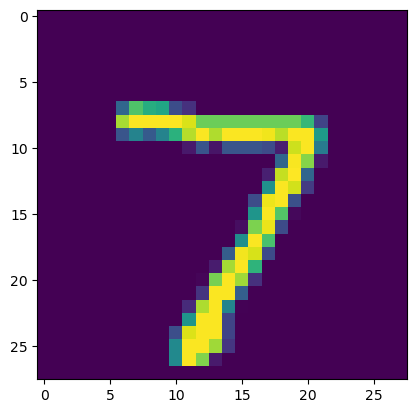

In [4]:
# imshow()를 통해 데이터 확인하기
n = 0
print(plt.imshow(test_images[n]))
print("숫자: ",test_labels[n])

## 모델 구성

이제 Keras를 사용하여 분류 모델을 구성해 보겠습니다. Keras에서는 Sequential 모델을 사용하여 간단한 순차적인 모델을 구성할 수 있습니다. Sequential 모델은 여러 개의 레이어를 차례로 쌓아서 구성합니다.

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # 28x28 픽셀의 이미지를 784차원 벡터로 펼침
    tf.keras.layers.Dense(128, activation='relu'), # 128개의 노드를 가진 완전 연결층 (ReLU 활성화 함수 사용)
    tf.keras.layers.Dense(10, activation='softmax') # 10개의 노드를 가진 완전 연결층 (softmax 활성화 함수 사용)
])

## 모델 컴파일

모델을 생성한 후, 우리는 이를 컴파일해야 합니다. 이 단계에서는 어떤 옵티마이저를 사용할지, 어떤 손실 함수를 사용할지, 그리고 어떤 지표(metric)를 사용할지를 정의합니다. 다음은 모델 컴파일 예시입니다:

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

compile() 메서드는 모델을 학습하기 전에 학습과정을 구체화하는 역할을 합니다. 여기서는 최적화 알고리즘으로 'adam'을 사용하고, 손실 함수로는 Sparse Categorical Crossentropy를 사용하며, 모델의 평가 지표로 정확도를 사용합니다.

## 모델 학습

모델 컴파일 후, 우리는 모델을 학습시켜야 합니다. 이 단계에서는 fit() 메서드를 사용합니다. fit() 메서드는 모델을 실제로 학습시키는 역할을 합니다. train_images와 train_labels는 모델이 학습할 학습 데이터셋입니다. epochs는 전체 데이터셋을 몇 번 반복해서 학습시킬지를 결정합니다. validation_data는 학습 과정에서 검증에 사용할 데이터셋입니다.

In [7]:
# 모델 학습
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.2)

Epoch 1/5
  82/1500 [>.............................] - ETA: 0s - loss: 1.0183 - accuracy: 0.7317  

2023-04-21 14:00:20.284801: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1500/1500 [==============================] - 1s 777us/step - loss: 0.2941 - accuracy: 0.9161 - val_loss: 0.1609 - val_accuracy: 0.9517
Epoch 2/5
1500/1500 [==============================] - 1s 750us/step - loss: 0.1321 - accuracy: 0.9614 - val_loss: 0.1253 - val_accuracy: 0.9640
Epoch 3/5
1500/1500 [==============================] - 1s 743us/step - loss: 0.0901 - accuracy: 0.9736 - val_loss: 0.1026 - val_accuracy: 0.9697
Epoch 4/5
1500/1500 [==============================] - 1s 746us/step - loss: 0.0667 - accuracy: 0.9798 - val_loss: 0.0999 - val_accuracy: 0.9690
Epoch 5/5
1500/1500 [==============================] - 1s 757us/step - loss: 0.0515 - accuracy: 0.9843 - val_loss: 0.0867 - val_accuracy: 0.9740


## 모델 평가

학습이 진행될 때마다, 현재 학습 진행 상황이 콘솔에 출력됩니다. 학습이 완료되면, 모델이 test_images 데이터셋에서 얼마나 잘 동작하는지를 평가할 수 있습니다.

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0803 - accuracy: 0.9754 - 187ms/epoch - 597us/step

Test accuracy: 0.9753999710083008


evaluate() 메서드는 모델의 정확도와 손실 값을 반환합니다. verbose=2는 평가 과정에서 로그를 출력하지 않도록 합니다. 마지막으로, 테스트 데이터셋에서 모델의 정확도를 출력합니다.

## 학습한 모델 저장

TensorFlow 2에서 Keras 모델을 저장하는 가장 간단한 방법은 model.save() 메서드를 사용하는 것입니다.<br>
이 메서드는 Keras 모델을 HDF5 파일로 저장합니다.

예를 들어, my_model이라는 Keras 모델이 있다고 가정해봅시다. 이 모델을 my_model.h5라는 파일에 저장하려면 다음과 같이 코드를 작성할 수 있습니다.

In [9]:
# 모델 저장
model.save('my_model.h5')

모델을 저장할 때, 모델 구조와 모델 가중치가 모두 저장됩니다. <br>
이러한 저장 방법을 이용해 저장된 모델은 tensorflow.keras.models.load_model 함수를 사용하여 불러올 수 있습니다.

In [10]:
from tensorflow.keras.models import load_model

loaded_model = load_model('my_model.h5')

In [11]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 모델 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0803 - accuracy: 0.9754 - 154ms/epoch - 491us/step

Test accuracy: 0.9753999710083008
